# Mediana dla obrazu kolorowego

Idea filtracji medianowej jest dość prosta dla obrazów w odcieniach szarości.
Dla obrazów kolorowych trudniej jest określić kryterium wg. którego szeregowane będą wartości, z których wyznaczana będzie mediana.

Jedną z możliwości wykonania filtracji medianowej dla obrazów kolorowych (na podstawie *The Image Processing Handbook*, J. Russ) jest wykorzystanie następującej definicji mediany:
``mediana to ten piksel z otoczenia, którego odległość do innych pikseli z otoczenia jest najmniejsza''.
Jako miarę odległości wykorzystujemy pierwiastek z sumy kwadratów różnic poszczególnych składowych R,G,B.
Zatem odległość między dwoma pikselami wyraża się wzorem:
\begin{equation}
dRGB = \sqrt{(R_1-R_2)^2+(G_1-G_2)^2+(B_1-B_2)^2}
\end{equation}

Warto zwrócić uwagę, że istnieje wiele możliwości zdefiniowania porównywania wielkości wektorowych (jeden piksel to wektor o trzech składowych).
Można zamiast odległości wykorzystać kąt albo połączyć oba parametry.
Ponadto istnieje możliwość dodania do wektora dodatkowych składowych - tak aby lepiej opisać piksel.

Celem zadania jest implementacja opisanego algorytmu.

1. Wczytaj obraz *lenaRGBSzum.png* (dostępny na git).
2. Zdefiniuj rozmiar okna.
3. Wykonaj pętle po pikselach, dla których okno jest zdefiniowane (pomiń brzeg obrazu).
4. Dla każdego piksela pobierz okno o właściwym rozmiarze.
5. Wykonaj pętle po oknie, wewnątrz której obliczona zostanie suma odległości.
    - Obliczanie różnicy: `window - window[rowWin, colWin]`.
    - Obliczanie kwadratów: `np.square`.
    - Obliczanie pierwiastka: `np.sqrt`.
    - Obliczanie sumy metodą `.sum`.
6. Po obliczeniu macierzy odległości wyznacz argument elementu minimalnego.
Wykorzystaj funkcję `np.argmin`.
Argument funkcji zostanie spłaszczony, jeśli ma więcej niż jeden wymiar.
Aby przekonwertować spłaszczony indeks na indeks macierzy wykorzystaj funkcję `np.unravel_index`.
7. Przypisz odpowiedni wektor wartości do piksela obrazu wynikowego.
8. Wyświetl obraz oryginalny i przefiltrowany.
9. Przeprowadź dwa eksperymenty - dla obrazu _lenaRGB_ oraz _lenaRGBszum_.

In [3]:
import matplotlib.pyplot as plt
import cv2
import math
import numpy as np
import os

if not os.path.exists("lenaRGB.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/lenaRGB.png --no-check-certificate
if not os.path.exists("lenaRGBSzum.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/lenaRGBSzum.png --no-check-certificate
        
lena_szum = cv2.imread("lenaRGBSzum.png")
lena_szum = cv2.cvtColor(lena_szum, cv2.COLOR_BGR2RGB)

lena = cv2.imread("lenaRGB.png")
lena = cv2.cvtColor(lena, cv2.COLOR_BGR2RGB)

window = 3


In [4]:
def median_rgb(img,window):

    X,Y,Z=img.shape
    img_copy=np.zeros((X,Y,Z)).astype('uint8')
    polowa = window//2
    for i in range(0+window//2,X-window//2):
        for j in range(0+window//2,Y-window//2):
            okno = img[i-polowa:i+polowa+1,j-polowa:j+polowa+1,:]
            mediana = np.zeros((window,window))
            for a in range(window):
                for b in range(window):
                    mediana[a,b]=np.sqrt(np.sum(np.square(okno[a,b,:]-okno[:,:,:])))
            amin=np.argmin(mediana)
            idx,idy = np.unravel_index(amin,(window,window))
            img_copy[i,j,:]=okno[idx,idy,:]
    return img_copy

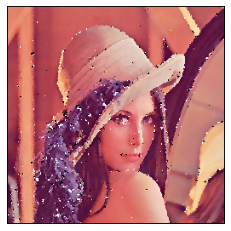

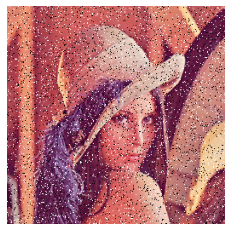

In [8]:
mediana=median_rgb(lena_szum,3)

plt.imshow(mediana)
plt.axis('off')
plt.show()
plt.imshow(lena_szum)
plt.axis('off')
plt.show()

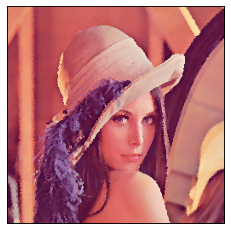

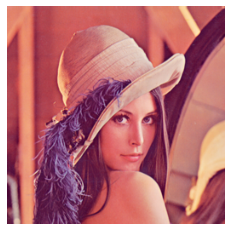

In [6]:
mediana=median_rgb(lena,3)

plt.imshow(mediana)
plt.axis('off')
plt.show()
plt.imshow(lena)
plt.axis('off')
plt.show()